In [1]:
from coin2dic import coin2dic
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os
import scipy.signal as signal
import numpy as np

In [2]:
LAST_YEARS_DIR = './Crypto_19-20' 
coins = pd.DataFrame()
for csv_file in os.listdir(LAST_YEARS_DIR):
    file_name = os.path.join(LAST_YEARS_DIR, csv_file)
    coin_dict = coin2dic(file_name)
    coins = coins.append(coin_dict, ignore_index=True)
coins = coins.set_index('Name')
coins.head()

,market_cap,normalized_price,price,volume,year
Name,,,,,
Kyber Network,"[196144242.0, 204780129.0, 203729042.0, 178277...","[0.5193962765957447, 0.5425531914893618, 0.542...","[0.976465, 1.02, 1.02, 0.888998, 0.81809, 0.79...","[25643963.0, 31120018.0, 39133662.0, 26494678....","[2020.0, 2020.0, 2020.0, 2020.0, 2020.0, 2020...."
XRP,"[28100510377.0, 27492190918.0, 20112122024.0, ...","[1.0, 0.9780511768150731, 0.7158171883242908, ...","[0.619851, 0.606246, 0.4437, 0.269642, 0.25393...","[10280250882.0, 15391721339.0, 19097682286.0, ...","[2020.0, 2020.0, 2020.0, 2020.0, 2020.0, 2020...."
Stellar,"[3814433497.0, 4207379426.0, 2176343295.0, 168...","[0.9042651783507702, 1.0, 0.5330237251832936, ...","[0.17563, 0.194224, 0.103526, 0.080294, 0.0815...","[410343063.0, 987586583.0, 689900728.0, 130851...","[2020.0, 2020.0, 2020.0, 2020.0, 2020.0, 2020...."
Tether,"[19683467751.0, 19126891188.0, 18454866337.0, ...","[0.9803921568627451, 0.9803921568627451, 0.979...","[1.0, 1.0, 0.999203, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[41702527218.0, 56283936388.0, 80187383235.0, ...","[2020.0, 2020.0, 2020.0, 2020.0, 2020.0, 2020...."
aelf,"[69003677.0, 56730633.0, 54595630.0, 51178745....","[0.5235472970181686, 0.4304280650731619, 0.414...","[0.126733, 0.104192, 0.100271, 0.093996, 0.090...","[15453728.0, 9148555.0, 20150654.0, 8634948.0,...","[2020.0, 2020.0, 2020.0, 2020.0, 2020.0, 2020...."


In [3]:
def moving_avg(x, n):
    if n ==0:
        return x
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

101 101 201


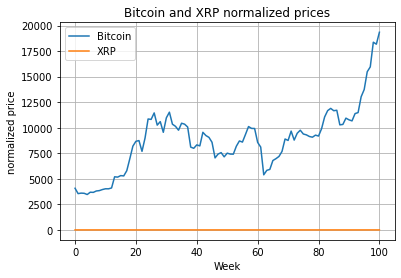

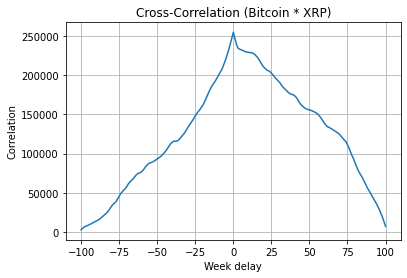

In [4]:
# Las monedas que tengan una correlación más alta en 0 serán las monedas que durante los últimos dos años siguienron un comportamiento semanal similar al bitcoin. Además, si se encuentran máximos en una posición que no sea el 0 se puede pensar que las monedas comparadas se comportan de forma similar pero con un corrimiento en tiempo, lo cual puede ser útil para encontrar monedas "testigo".
bitcoin = coins.loc['Bitcoin']['price']
XRP = coins.loc['XRP']['price']
XRP.reverse()
bitcoin.reverse()
plt.figure(1)
plt.plot(bitcoin, label='Bitcoin')
plt.plot(XRP, label='XRP')
plt.grid(True)
plt.legend()
plt.title('Bitcoin and XRP normalized prices')
plt.ylabel('normalized price')
plt.xlabel('Week')
correlation = signal.correlate(bitcoin,XRP)
print(len(XRP),len(bitcoin),len(correlation))

plt.figure(2)
x = np.arange(-100,101)
plt.plot(x,correlation)
plt.title('Cross-Correlation (Bitcoin * XRP)')
plt.ylabel('Correlation')
plt.xlabel('Week delay')
plt.grid(True)


In [5]:
correlation = []
max_correlation = []
week_delay = []
for index, row in coins.iterrows():
    print(row)
    if index != 'Bitcoin':
        normalized_price = row['price']
        normalized_price.reverse()
        normalized_price = moving_avg(normalized_price, 4)
        corr = signal.correlate(moving_avg(bitcoin, 4), normalized_price)
        max_corr = max(corr)
        delay = np.argmax(corr) - 96
        correlation.append(corr)
        max_correlation.append(max_corr)
        week_delay.append(delay)
        print(index, delay, max_corr)
    else:
        correlation.append(0)
        max_correlation.append(0)
        week_delay.append(0)
coins['BTC correlation'] = correlation
coins['max BTC correlation'] = max_correlation
coins['week delay'] = week_delay

5275919.278875001
market_cap          [700636678.0, 618364248.0, 646768194.0, 603586...
normalized_price    [0.9062519806238398, 0.7998344360153405, 0.836...
price               [0.700637, 0.618364, 0.646768, 0.603586, 0.664...
volume              [26549577.0, 9329734.0, 20864858.0, 8911596.0,...
year                [2020.0, 2020.0, 2020.0, 2020.0, 2020.0, 2020....
Name: THETA, dtype: object
THETA 1 209724.30453995254
market_cap          [94441821.0, 91702036.0, 89633790.0, 81343746....
normalized_price    [0.4848484848484848, 0.47138047138047134, 0.45...
price               [1.44, 1.4, 1.36, 1.24, 1.27, 1.26, 1.38, 1.25...
volume              [2892469.0, 2850086.0, 5877364.0, 683478.0, 11...
year                [2020.0, 2020.0, 2020.0, 2020.0, 2020.0, 2020....
Name: MonaCoin, dtype: object
MonaCoin 1 1217666.815122091
market_cap          [5517178551.0, 5227758602.0, 5452444708.0, 410...
normalized_price    [0.6093932322053676, 0.5778879813302217, 0.603...
price               [83.56, 7

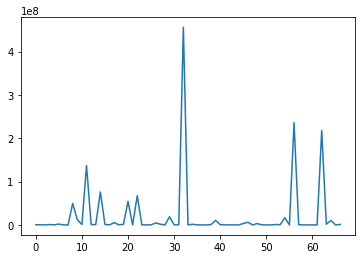

In [6]:
plt.plot(max_correlation)


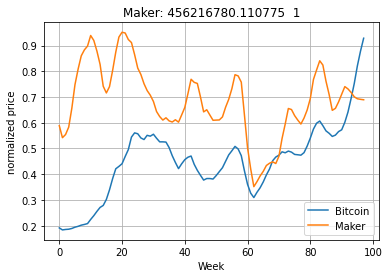

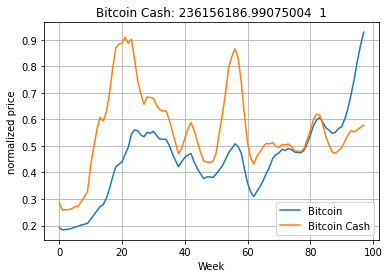

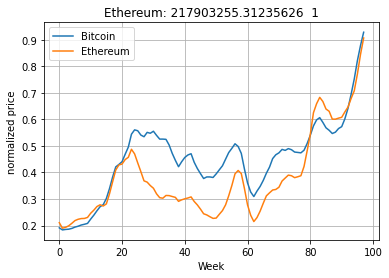

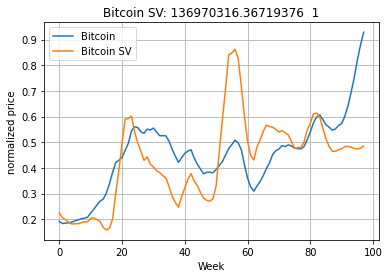

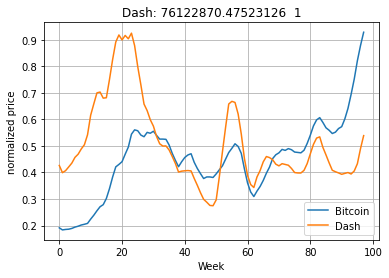

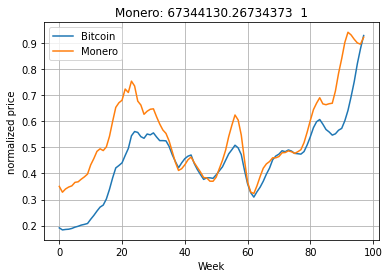

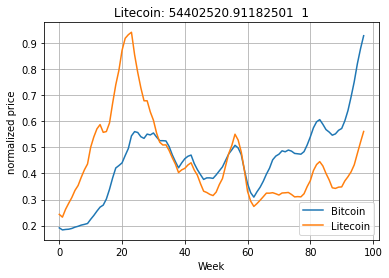

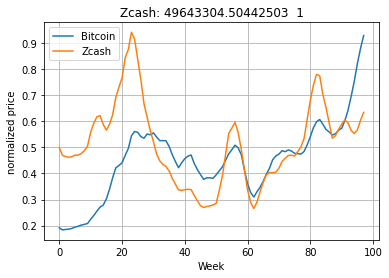

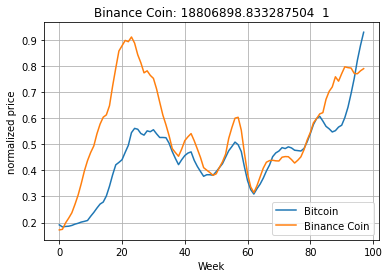

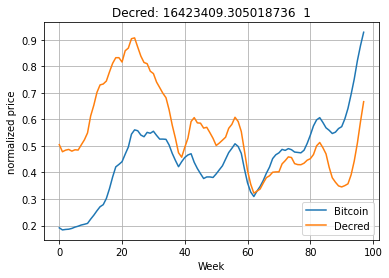

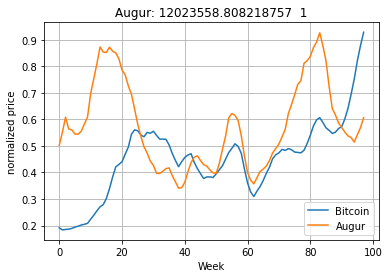

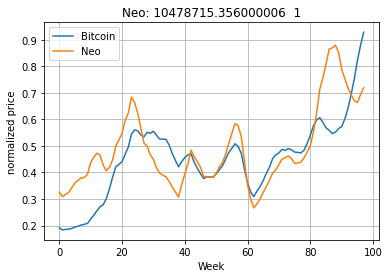

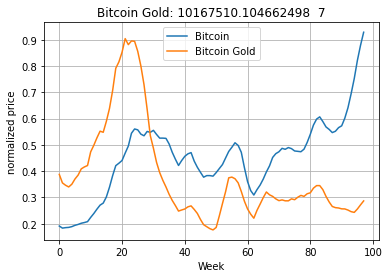

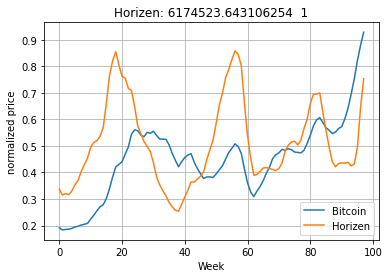

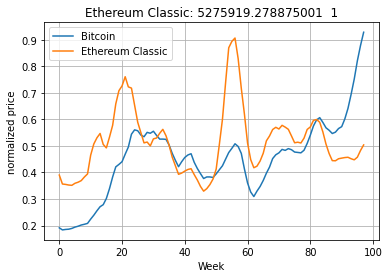

In [7]:
# Se obtendrán los 10 picos principales para analizarlos individualmente
bitcoin = np.array(bitcoin)
bitcoin = bitcoin/max(bitcoin)
for n in range(15):
    max_index = np.argmax(max_correlation)
    max_correlation[np.argmax(max_correlation)] = 0
    index = coins.index[max_index]
    coin = coins.loc[index]['normalized_price']
    coin.reverse()
    plt.figure(n)
    plt.plot(moving_avg(bitcoin,4), label='Bitcoin')
    plt.plot(moving_avg(coin,4), label=index)
    plt.title(index + ': ' + str(coins.loc[index]['max BTC correlation']) + '  ' + str(coins.loc[index]['week delay']))
    plt.ylabel('normalized price')
    plt.xlabel('Week')
    plt.legend()
    plt.grid(True)

plt.show()

### La única moneda que tuvo un valor alto con mayor delay que 0 es bitcoin gold, sin embargo se puede ver que las curvas no son tan similares. Se debe buscar otra métrica para hacer las comparaciones